# Numerical Study of the Gravitational Shock Wave Inside a Spherical Charged Black Hole by Ori
##  Geoff Cope
##  Univeristy of Utah
##  January 8, 2022

Go back and add stress energy tensor

https://arxiv.org/pdf/1610.04355.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,theta,phi,du,dv,dtheta,dphi = symbols('u v theta phi du dv dtheta dphi')

In [4]:
sigma = Function('sigma')(u,v)
sigma

In [5]:
r = Function('r')(u,v)
r

In [7]:
variables = Matrix( [u,v,theta,phi] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [8]:
differentials = Matrix( [du,dv,dtheta,dphi] ) 
differentials

⎡  du  ⎤
⎢      ⎥
⎢  dv  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [11]:
lineElement = expand(- exp(sigma)*du*dv + r**2 * (dtheta**2 + sin(theta)**2 * dphi**2 )) 
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡              σ(u, v)                             ⎤
⎢            -ℯ                                    ⎥
⎢    0       ──────────     0             0        ⎥
⎢                2                                 ⎥
⎢                                                  ⎥
⎢  σ(u, v)                                         ⎥
⎢-ℯ                                                ⎥
⎢──────────      0          0             0        ⎥
⎢    2                                             ⎥
⎢                                                  ⎥
⎢                         2                        ⎥
⎢    0           0       r (u, v)         0        ⎥
⎢                                                  ⎥
⎢                                   2          2   ⎥
⎣    0           0          0      r (u, v)⋅sin (θ)⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡              σ(u, v)                             ⎤
⎢            -ℯ                                    ⎥
⎢    0       ──────────     0             0        ⎥
⎢                2                                 ⎥
⎢                                                  ⎥
⎢  σ(u, v)                                         ⎥
⎢-ℯ                                                ⎥
⎢──────────      0          0             0        ⎥
⎢    2                                             ⎥
⎢                                                  ⎥
⎢                         2                        ⎥
⎢    0           0       r (u, v)         0        ⎥
⎢                                                  ⎥
⎢                                   2          2   ⎥
⎣    0           0          0      r (u, v)⋅sin (θ)⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("u v theta phi")
u,v,theta,phi = syms

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢⎡∂                                                                                       ⎤  ⎡0       0                      0           
⎢⎢──(σ(u, v))  0                 0                                    0                   ⎥  ⎢                                           
⎢⎢∂u                                                                                      ⎥  ⎢   ∂                                       
⎢⎢                                

In [19]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛                            2         ⎞                                                                                              
⎢  ⎜∂           ∂              ∂          ⎟                             2                                                                
⎢2⋅⎜──(r(u, v))⋅──(σ(u, v)) - ───(r(u, v))⎟                            ∂                                                                 
⎢  ⎜∂u          ∂u              2         ⎟          2             2⋅─────(r(u, v))                                                      
⎢  ⎝                          ∂u          ⎠         ∂                ∂v ∂u                                                               
⎢──────────────────────────────────────────     - ─────(σ(u, v)) - ────────────────                                           0          
⎢                 r(u, v)                         ∂v ∂u                r(u, v)                                                           
⎢                                 

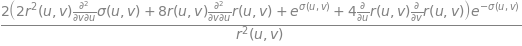

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                ⎛                            2         ⎞                                                                                
⎢                ⎜∂           ∂              ∂          ⎟                                2                                               
⎢              2⋅⎜──(r(u, v))⋅──(σ(u, v)) - ───(r(u, v))⎟                               ∂                   σ(u, v)       ∂           ∂  
⎢                ⎜∂u          ∂u              2         ⎟                 2.0⋅r(u, v)⋅─────(r(u, v)) + 0.5⋅ℯ        + 2.0⋅──(r(u, v))⋅──(
⎢                ⎝                          ∂u          ⎠                             ∂v ∂u                               ∂u          ∂v 
⎢              ──────────────────────────────────────────                 ───────────────────────────────────────────────────────────────
⎢                               r(u, v)                                                                    2                             
⎢                                 

In [22]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [23]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

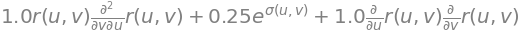

In [36]:
equation3 = (1/2)*simplify(einst.tensor())[1,0].args[1]
equation3

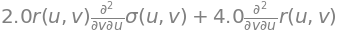

In [40]:
equation4 = simplify(einst.tensor())[3,3].args[2]
equation4

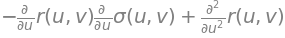

In [30]:
equation5 = (-1)*simplify(einst.tensor())[0,0].args[2]
equation5

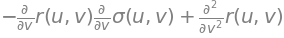

In [31]:
equation6 = (-1)*simplify(einst.tensor())[1,1].args[2]
equation6

In [41]:
vacuumFieldEquations = Matrix([equation3,equation4,equation5,equation6])
vacuumFieldEquations

⎡               2                                                        ⎤
⎢              ∂                    σ(u, v)       ∂           ∂          ⎥
⎢1.0⋅r(u, v)⋅─────(r(u, v)) + 0.25⋅ℯ        + 1.0⋅──(r(u, v))⋅──(r(u, v))⎥
⎢            ∂v ∂u                                ∂u          ∂v         ⎥
⎢                                                                        ⎥
⎢                           2                    2                       ⎥
⎢                          ∂                    ∂                        ⎥
⎢            2.0⋅r(u, v)⋅─────(σ(u, v)) + 4.0⋅─────(r(u, v))             ⎥
⎢                        ∂v ∂u                ∂v ∂u                      ⎥
⎢                                                                        ⎥
⎢                                              2                         ⎥
⎢                  ∂           ∂              ∂                          ⎥
⎢                - ──(r(u, v))⋅──(σ(u, v)) + ───(r(u, v))                ⎥
⎢                  ∂u    